# Are women asking for lower loan amounts?

### Import packages

At the beginning of our notebooks we always import all the libraries we will use.

In [5]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/Users/Sara/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


You are using Jupyter notebook to run your code. it is an incredibly versatile tool and we can tailor the configurations to suit our preferences. For example, in the cell below we tell Jupyter to output the results of all commands in a cell (the default is only to output the results of the last command). For more interesting and incredibly useful Jupyter tricks take a look at [this](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) blog post. Using Jupyter shortcuts will help you work faster. Some valuable shortcuts have been put together in [this](http://www.math.umassd.edu/~ahausknecht/aohWebsiteSpring2017/examples/pythonExamples/downloads/docs/JuypterKeyboardShortcutsV1Sp2016.pdf) great pdf.

In [6]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We use a pandas command to tailor how the data is presented in the command below. There are 76 columns in our final Kiva dataset. The default panda settings hide some of the columns. We make all columns visible by setting the display to 80.

In [7]:
# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

## Import data

In [8]:
data_path = '~/intro_course_data_science_for_good/data'

In [9]:
df=pd.read_csv(data_path+'/df.csv', low_memory=False)

In the cell below, we take a random sample of 3 rows to get a feel for the data.

In [10]:
df.sample(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
116373,126015,126015,125957,Food Production/Sales,NaN,False,"[{'first_name': 'Millicent', 'last_name': '', ...",NaN,['en'],Millicent A. is a 25-year old entrepreneur who...,NaN,NaN,NaN,600,2007-06-03T09:26:58Z,11123,39298,1,0,0,15,600,Kenya,KE,town,-0.1 34.75,point,Kisumu,Millicent,24.0,[],NaN,2007-06-03T03:21:14Z,Food,funded,[],600.0,USD,2007-06-17T09:26:58Z,600,[],none,NaN,partner,NaN,14,[],NaN,NaN,NaN,To increase the stock of bananas for her busin...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.000000,0.000000,NaN,0.000000,NaN,2081413.0,1.0,0.000000,913.0,K-Met Savings and Credit Cooperative Ltd,NaN,NaN,NaN,0.0,NaN,2006-11-14T17:44:51Z,closed,361650.0,http://www.kmet.co.ke
94580,104206,104206,104148,Retail,NaN,False,"[{'first_name': 'Meoliole', 'last_name': '', '...",NaN,['en'],"Meoliole is 37 years old, married to Naomi. Th...",NaN,NaN,NaN,600,2012-01-09T17:14:25Z,371666,944361,1,0,0,20,600,Kenya,KE,town,1 38,point,Oloitoktok,Meoliole,133.0,[],NaN,2011-12-23T15:00:13Z,Retail,funded,[],50000.0,KES,2011-12-05T08:00:00Z,600,[],shared,0.2,lender,NaN,14,[],NaN,Victoria Lazarova,1669010.0,To purchase stocks of hides and skin for sale.,NaN,NaN,NaN,NaN,1,34.9,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.089354,3.652283,NaN,8.017062,NaN,1495190.0,1.0,16.058249,30794.0,VisionFund Kenya,36.0,NaN,-1.7,2.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,11366975.0,http://www.visionfundkenya.co.ke/


Removing outliers turns out to have been very useful. In the boxplot above we can see that expired loans tend to be higher in amount than funded, meaning that asking for large amounts may make funding more difficult.

## Are women asking for lower loan amounts than men?

In order to answer this question, we need to know what the gender of each borrower is. This field does not exist as a column in the data but does exist as a nested json field 'borrowers'. We extract the field in the code below to make a new field which is either Male or Female.

In [11]:
df['gender']=np.where(df['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='M'),"Male",(np.where(df['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='F'),"Female","")))

Now we can do some exploratory analysis to understand the effect of gender on loan amount.

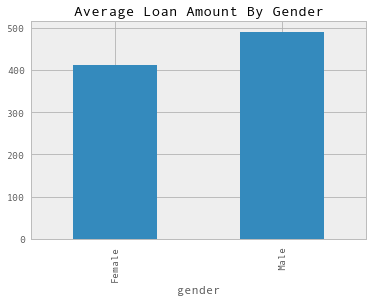

In [12]:
df[df['borrower_count'] == 1].groupby('gender')['loan_amount'].mean().plot(kind="bar", title="Average Loan Amount By Gender")

In [13]:
df[df['borrower_count'] == 1].groupby('gender')['loan_amount'].mean()

gender
Female    412.053819
Male      490.876162
Name: loan_amount, dtype: float64

A more nuanced way to look at this is using a boxplot. Instead of only plotting the mean average it also plots the 25th, 50th and 75th percentile.

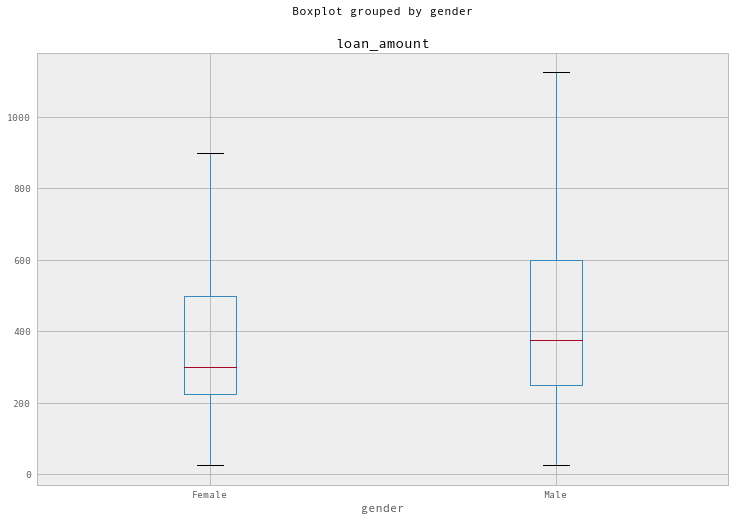

In [14]:
df[(df['borrower_count'] == 1)].boxplot(column='loan_amount', by='gender', showfliers=False, figsize=(12,8))

The chart above shows us some compelling results, suggesting that the distribution of loan amounts requested for mean and women is very different. It shows us at the 25th, 50th and 75th percentile the loan amount requested by women is lower.

The chart below shows that women tend to request more loans than men under 500 dollars whereas men request more loans than women at every value above that amount.

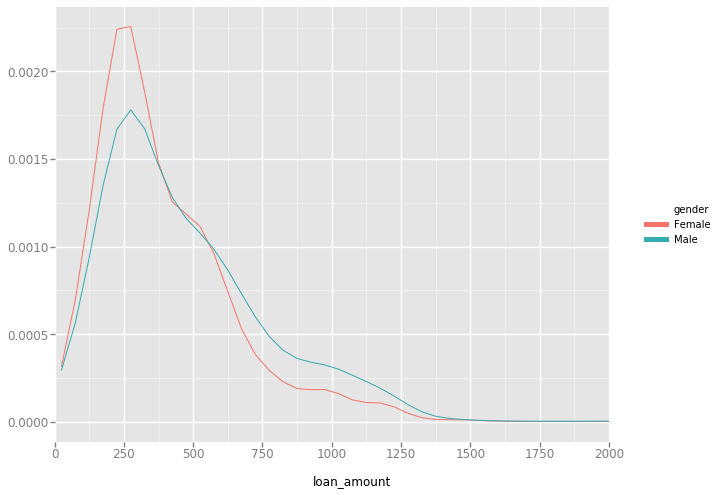

<ggplot: (-9223372036560019908)>

In [15]:
ggplot(df[(df['borrower_count'] == 1)], aes(x='loan_amount',colour='gender')) + geom_density() + xlim(0,2000)

It could be that men are consistently asking for a higher loan amount because of the industry they are in. Let's take a look at gender distribution by industry.

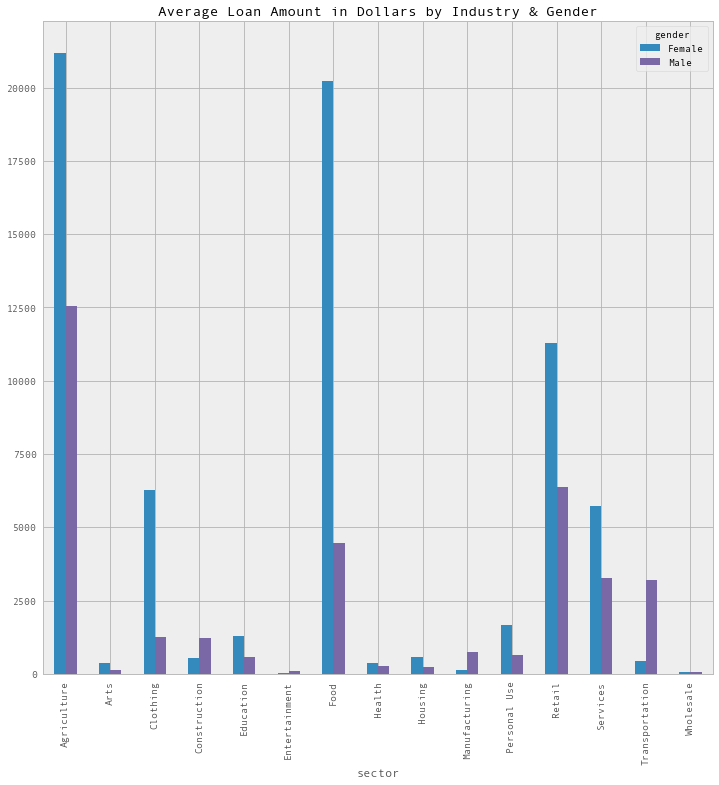

In [16]:
df[(df['borrower_count'] == 1)].groupby(['sector','gender'])['loan_amount'].count().unstack().reset_index().plot(kind='bar', x='sector', title="Average Loan Amount in Dollars by Industry & Gender",figsize=(12, 12))

In the chart above we look at raw number of loans given to females and males, but it may be more useful to look at this in terms of %. In the chart below we can see that there are a higher % of male loans in wholesale, transportation, manufacturing, entertainment and construction. In all other categories the % of female loans is higher.

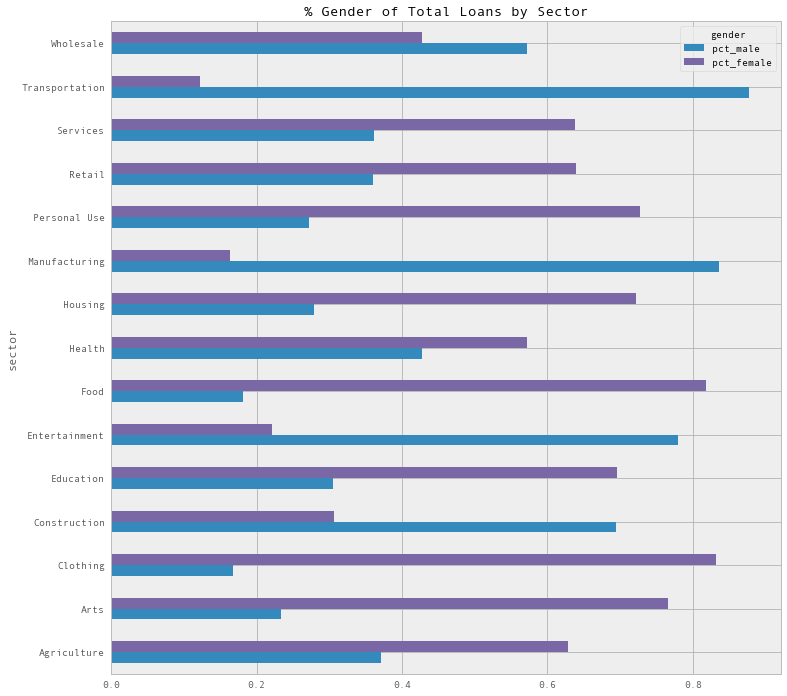

In [17]:
sector_by_gender = df[(df['borrower_count'] == 1)].groupby(['sector','gender']).size().unstack().reset_index()
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count'] 
sector_by_gender['pct_male'] = sector_by_gender['Male'] / sector_by_gender['total_count']

sector_by_gender[['sector','pct_male','pct_female']].plot(kind="barh", x="sector",title="% Gender of Total Loans by Sector",figsize=(12, 12))

Now, let us look at the loan amount requested in each sector by each gender. In the chart below, we see that our hypothesis that the difference was driven by natural price differences between industry is not correct. Men are asking for larger loan amounts in all industries, and the difference is highest in industries where they are not a majority. 

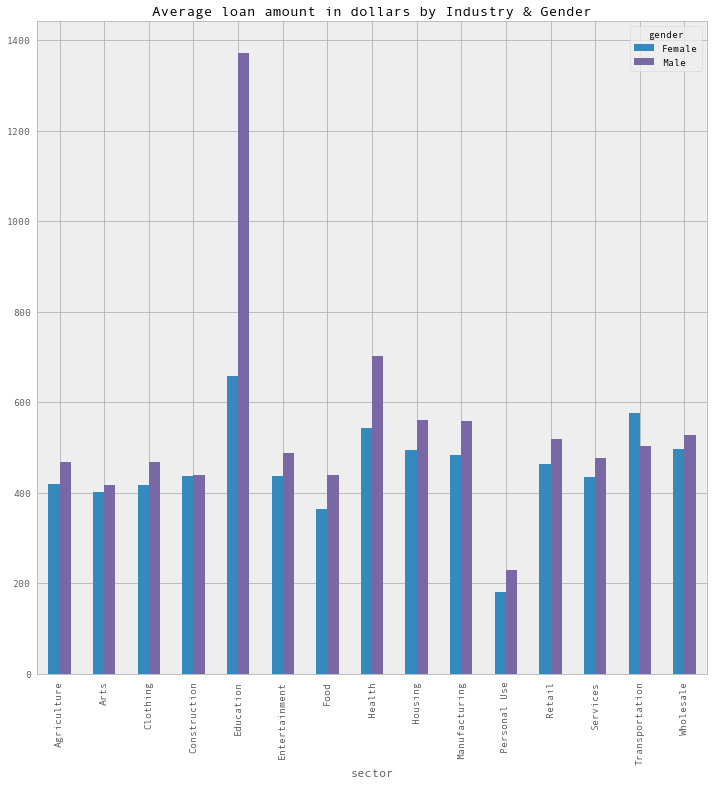

In [18]:
df[(df['borrower_count'] == 1)].groupby(['sector','gender'])['loan_amount'].mean().unstack().reset_index().plot(kind='bar', x='sector', title="Average loan amount in dollars by Industry & Gender",figsize=(12, 12))

In [19]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url,gender
0,0,0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/,Female
1,1,1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/,Male


Finally, let us take a look at the relationship between partner and gender.

In [20]:
partner_by_gender = df[(df['borrower_count'] == 1)].groupby(['partner_name','gender'])['loan_amount'].agg(['sum','count','mean','min']).unstack().reset_index()
partner_by_gender.head(2)


partner_by_gender['total_count'] = (partner_by_gender['sum']['Male'] + partner_by_gender['sum']['Female'])
partner_by_gender['pct_female'] = partner_by_gender['sum']['Female'] / partner_by_gender['total_count'] 
partner_by_gender['pct_male'] = partner_by_gender['sum']['Male'] / partner_by_gender['total_count']
partner_by_gender['partner_female'] = np.where(partner_by_gender['pct_female']>=.6, 'yes', 'no')
partner_by_gender[(partner_by_gender['pct_female']<=.2)].head(20) #moringa school appears!

partner_name      sum           count              mean  \
gender                            Female     Male Female  Male      Female   
0       Action Now: Kenya (ANK)  75625.0  51675.0  127.0  78.0  595.472441   
1       Asante Kenya Foundation  29000.0  20800.0   90.0  62.0  322.222222   

                      min         
gender        Male Female   Male  
0       662.500000   50.0   75.0  
1       335.483871  300.0  300.0

partner_name     sum           count          mean              \
gender                  Female     Male Female  Male  Female        Male   
22      Moringa School  6300.0  43250.0    3.0  21.0  2100.0  2059.52381   

           min         total_count pct_female  pct_male partner_female  
gender  Female    Male                                                  
22      1900.0  1250.0     49550.0   0.127144  0.872856             no

Surprisingly, the chart below suggests that although women ask for less, they have a higher funded rate.Is this because they ask for less or because they are women? 

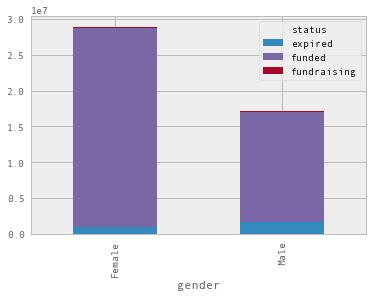

In [22]:
df[(df['borrower_count'] == 1)].groupby(['gender', 'status'])['loan_amount'].sum().unstack().plot(kind="bar", stacked=True, )

In [23]:
df.to_csv('~/intro_course_data_science_for_good/data/df_module.csv')